In [108]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize


#URL TO CONNECT
url="https://swapi.co/api/planets"

#RESPONSE
response=requests.get(url)


if response:#EXIT
    print('SUCCESS')    
    data=response.json()
    df=json_normalize(data['results'])
    print(df)
else:#ERROR
    print('Connection error')
    
    

SUCCESS
        name rotation_period orbital_period diameter              climate  \
0   Alderaan              24            364    12500            temperate   
1   Yavin IV              24           4818    10200  temperate, tropical   
2       Hoth              23            549     7200               frozen   
3    Dagobah              23            341     8900                murky   
4     Bespin              12           5110   118000            temperate   
5      Endor              18            402     4900            temperate   
6      Naboo              26            312    12120            temperate   
7  Coruscant              24            368    12240            temperate   
8     Kamino              27            463    19720            temperate   
9   Geonosis              30            256    11370      temperate, arid   

                                  gravity  \
0                              1 standard   
1                              1 standard   
2        

In [109]:
#DELETE Nan VALUES
df['population']=df['population'].replace(to_replace='unknown', value=0).dropna()
df['gravity']=df['gravity'].replace(to_replace='N/A', value=np.nan).dropna()
df = df[pd.notnull(df['gravity'])]
print(df)



        name rotation_period orbital_period diameter              climate  \
0   Alderaan              24            364    12500            temperate   
1   Yavin IV              24           4818    10200  temperate, tropical   
2       Hoth              23            549     7200               frozen   
4     Bespin              12           5110   118000            temperate   
5      Endor              18            402     4900            temperate   
6      Naboo              26            312    12120            temperate   
7  Coruscant              24            368    12240            temperate   
8     Kamino              27            463    19720            temperate   
9   Geonosis              30            256    11370      temperate, arid   

                                  gravity  \
0                              1 standard   
1                              1 standard   
2                            1.1 standard   
4  1.5 (surface), 1 standard (Cloud City)   
5   

In [110]:

#CHANGE (OBJECT)POPULATION TO (INT)POPULATION
df['population'] = pd.to_numeric(df['population'],errors='coerce')

#MEAN OF THE GROUPS
dn=dn.groupby('gravity').mean()




                                          population
gravity                                             
0.85 standard                               30000000
0.9 standard                            100000000000
1 standard                              201500000200
1.1 standard                                       0
1.5 (surface), 1 standard (Cloud City)       6000000


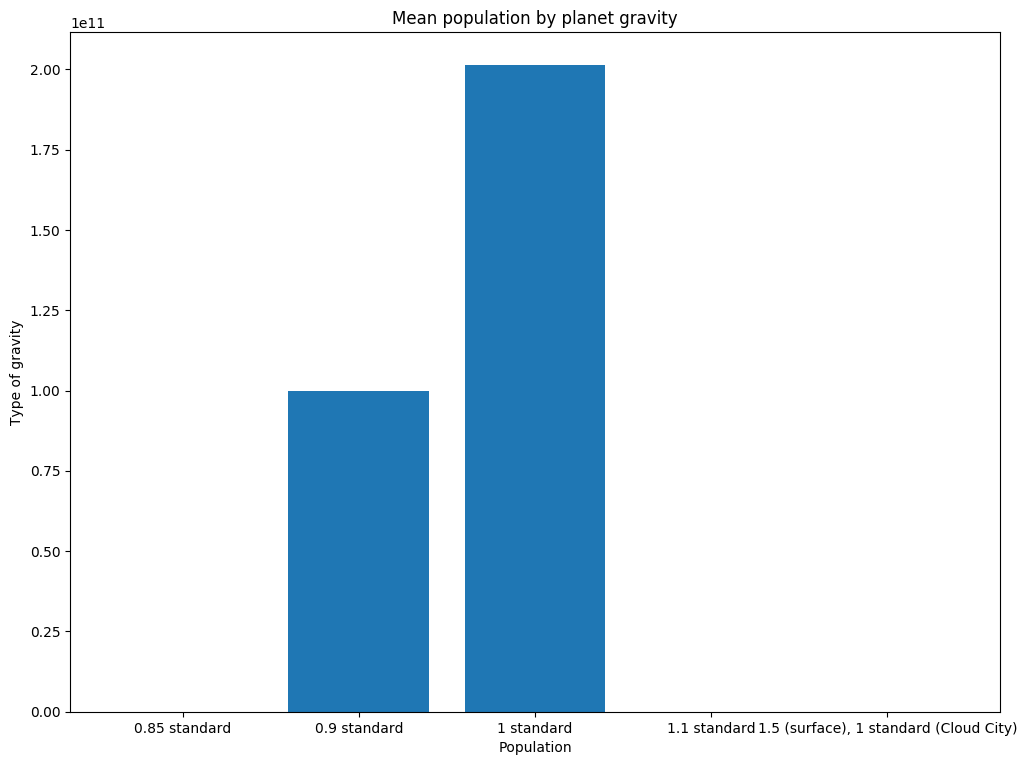

In [111]:

#DATAFRAME
print(dn)
#HISTOGRAM
fig, axes = plt.subplots(figsize=(12,9), dpi=100)
plt.bar(dn.index, height=dn['population'])
plt.title('Mean population by planet gravity');
plt.ylabel('Type of gravity');
plt.xlabel('Population');

